<a href="https://colab.research.google.com/github/jdmarinj/API_XM/blob/master/Datos_CO2_XM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Caso de ejemplo desarrollado por el equipo de analitica de Grupo GAMACO SAS. 

# Objetivos de este Notebook

* Explicar el comportamiento de la demanda industrial 
* Explicar cómo se pueden construir gráficas con los datos de consumo de energía y emisiones de CO2


**Índice**

1. [Importación de librerías](#section1)

2. [Factor de emisión equivalente de CO2](#section2)

3. [Cálculo de máximo, mínimo y promedio del precio de bolsa nacional](#section3)

4. [Cálculo de Emisiones en una Industria](#section4)

5. [Importación de datos de consumo](#section5)

<a id='section1'></a>
# Importación de librerías

In [5]:
#!pip install pydataxm

from pydataxm import *          # Importa la libreria que fue instalada con pip install pydataxm o tambien desde GitHub
import datetime as dt           # Permite trabajar con fechas 
import pandas as pd             # Manipulacion de datos
import matplotlib.pyplot as plt # Construcción de gráficas

In [61]:
objetoAPI = pydataxm.ReadDB()     # Construir la clase que contiene los métodos de pydataxm


<a id='section2'></a>
# Factor de emisión equivalente de CO2

In [153]:
df_demanda = objetoAPI.request_data('factorEmisionCO2e','Sistema', dt.date(2021, 1, 1), dt.date(2022, 10, 30))

In [154]:
df_demanda.tail(10)

,Id,Values_code,Values_Hour01,Values_Hour02,Values_Hour03,Values_Hour04,Values_Hour05,Values_Hour06,Values_Hour07,Values_Hour08,...,Values_Hour16,Values_Hour17,Values_Hour18,Values_Hour19,Values_Hour20,Values_Hour21,Values_Hour22,Values_Hour23,Values_Hour24,Date
658,Sistema,Sistema,126.77488,121.97963,117.25854,110.83845,107.80119,104.64773,113.35622,116.40212,...,103.09572,106.81971,106.82048,101.79495,105.27511,108.95566,109.83124,106.36974,95.62508,2022-10-21
659,Sistema,Sistema,84.33800,79.21520,71.08482,62.53963,61.80023,60.83305,59.14619,55.50536,...,70.79877,71.86918,71.57603,73.35592,73.20327,71.46860,69.40610,70.12866,66.23791,2022-10-22
660,Sistema,Sistema,65.92890,70.09630,67.66837,67.48109,74.49955,82.65807,82.68834,80.20306,...,83.19944,81.49293,71.42613,60.76469,56.67129,56.66792,58.92016,63.13468,65.20718,2022-10-23
661,Sistema,Sistema,69.30758,70.85584,69.06747,65.74861,60.32389,55.42883,46.39242,46.64222,...,45.38234,43.49951,46.65337,55.16268,53.18992,52.32108,57.31044,63.13078,64.98815,2022-10-24
662,Sistema,Sistema,66.53337,62.96769,56.86421,55.99038,52.02023,46.80646,46.21453,50.80750,...,56.84767,57.32876,54.44209,60.52870,59.05841,55.22854,54.35379,54.54460,54.03410,2022-10-25
663,Sistema,Sistema,59.09370,58.46762,62.57356,66.72514,59.64786,52.78148,51.20564,49.63936,...,66.19301,65.61413,63.63715,65.07694,63.22909,62.21184,68.03951,71.13322,72.82909,2022-10-26
664,Sistema,Sistema,76.92504,71.90739,66.76513,65.01095,63.48541,58.28729,58.17437,57.67209,...,76.14381,75.51980,73.39443,69.53518,69.59718,72.79127,75.40416,79.74054,81.88548,2022-10-27
665,Sistema,Sistema,82.14585,81.15423,76.68007,72.85707,69.51998,66.24139,64.09191,60.64081,...,71.06691,70.83182,64.61548,64.99974,67.10170,70.34046,74.40155,79.97415,81.60202,2022-10-28
666,Sistema,Sistema,70.06348,65.49422,60.34382,57.60087,56.17290,54.90659,54.03716,51.22404,...,69.25185,71.19111,67.32873,65.13293,69.81934,71.68927,75.43020,77.67959,79.25861,2022-10-29
667,Sistema,Sistema,75.06392,73.97250,76.44565,71.76890,71.50606,72.73716,74.59392,77.66156,...,66.40335,70.62263,72.84505,72.12815,72.58186,66.80715,67.60422,70.93303,74.79811,2022-10-30


<a id='section3'></a>
# 3. Cálculo de máximo, mínimo y promedio del precio de bolsa nacional

In [48]:
df_precio_bolsa = objetoAPI.request_data("PrecBolsNaci", "Sistema", dt.date(2022, 1, 1), dt.date(2022, 10, 31)) #consulta de la variable precio de bolsa nacional por sistema  
df_precio_bolsa.drop(columns=['Id', 'Values_code'], inplace=True)             #Eliminación de columnas innecesarias para los cálculos requeridos
df_precio_bolsa.set_index('Date', inplace=True)                               #Uso de la columna de 'Date' como índice
df_resumen_anual = df_precio_bolsa.aggregate(['mean', 'max', 'min'], axis=1) 

In [49]:
#df_resumen_anual.head()
df_resumen_anual.tail()

,mean,max,min
Date,,,
2022-10-27,226.239442,279.88540,101.20940
2022-10-28,245.413492,701.87195,101.19595
2022-10-29,171.370985,212.80986,101.13386
2022-10-30,117.093318,140.92711,95.22911
2022-10-31,177.233888,212.00868,101.33168


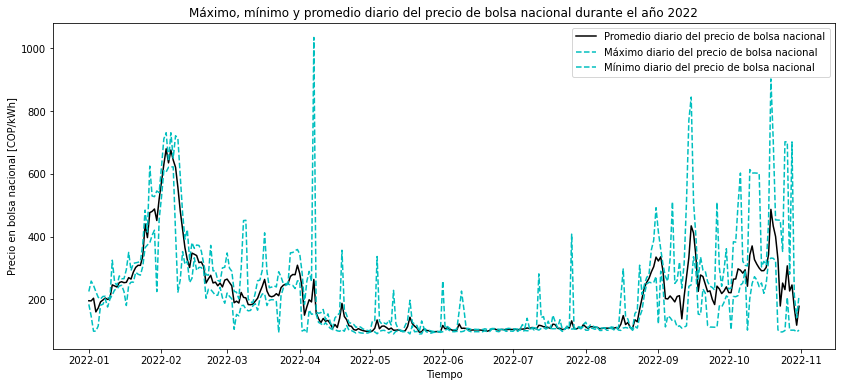

In [31]:
fig, ax = plt.subplots(1, 1, figsize=(14,6))
ax.plot(df_resumen_anual.index, df_resumen_anual['mean'], "k",  label='Promedio diario del precio de bolsa nacional')
ax.plot(df_resumen_anual.index, df_resumen_anual['max'], "c--", label='Máximo diario del precio de bolsa nacional')
ax.plot(df_resumen_anual.index, df_resumen_anual['min'], "c--", label='Mínimo diario del precio de bolsa nacional')
ax.set_ylabel('Precio en bolsa nacional [COP/kWh]')
ax.set_xlabel('Tiempo')
plt.title('Máximo, mínimo y promedio diario del precio de bolsa nacional durante el año 2022')
ax.legend()
plt.show()

In [123]:
df_precio_bolsa = objetoAPI.request_data("PrecBolsNaci", "Sistema", dt.date(2021, 1, 1), dt.date(2022, 10, 31)) #consulta de la variable precio de bolsa nacional por sistema  
df_precio_bolsa.drop(columns=['Id', 'Values_code'], inplace=True)             #Eliminación de columnas innecesarias para los cálculos requeridos
df_precio_bolsa.set_index('Date', inplace=True)                               #Uso de la columna de 'Date' como índice
df_resumen_anual = df_precio_bolsa.aggregate(['mean', 'max', 'min'], axis=1) 

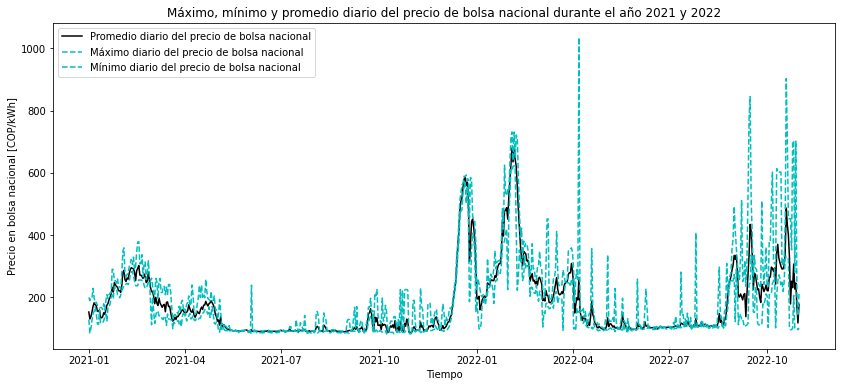

In [124]:
fig, ax = plt.subplots(1, 1, figsize=(14,6))
ax.plot(df_resumen_anual.index, df_resumen_anual['mean'], "k",  label='Promedio diario del precio de bolsa nacional')
ax.plot(df_resumen_anual.index, df_resumen_anual['max'], "c--", label='Máximo diario del precio de bolsa nacional')
ax.plot(df_resumen_anual.index, df_resumen_anual['min'], "c--", label='Mínimo diario del precio de bolsa nacional')
ax.set_ylabel('Precio en bolsa nacional [COP/kWh]')
ax.set_xlabel('Tiempo')
plt.title('Máximo, mínimo y promedio diario del precio de bolsa nacional durante el año 2021 y 2022')
ax.legend()
plt.show()


<a id='section3'></a>
# 4. Cálculo de Emisiones en una Industria

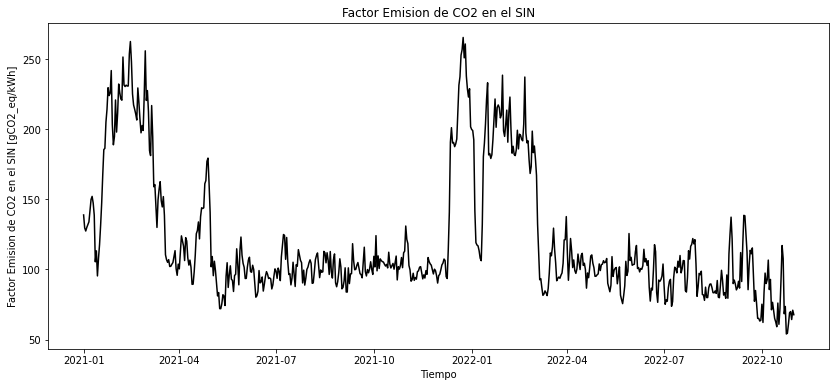

In [200]:
df_CO2 = objetoAPI.request_data('factorEmisionCO2e','Sistema', dt.date(2021, 1, 1), dt.date(2022, 10, 31))
df_CO2.set_index('Date', inplace=True)                               #Uso de la columna de 'Date' como índice
df_CO2.head(6) #Ver encabezado
df_CO2['demanda_diaria'] = df_CO2.mean(axis=1, skipna=True, numeric_only=True)
df_CO2.head(6)
fig, ax = plt.subplots(1, 1, figsize=(14,6))
ax.set_ylabel('Factor Emision de CO2 en el SIN [gCO2_eq/kWh]')
ax.set_xlabel('Tiempo')
plt.title('Factor Emision de CO2 en el SIN')
ax.plot(df_CO2.index, df_CO2['demanda_diaria'], "k",  label='Promedio diario de emisiones diarias de CO2')



In [47]:
#df_CO2.to_excel('/content/CO2.xlsx')

Text(0.5, 1.0, 'Factor Emision de gCO2/kWh en el SIN')

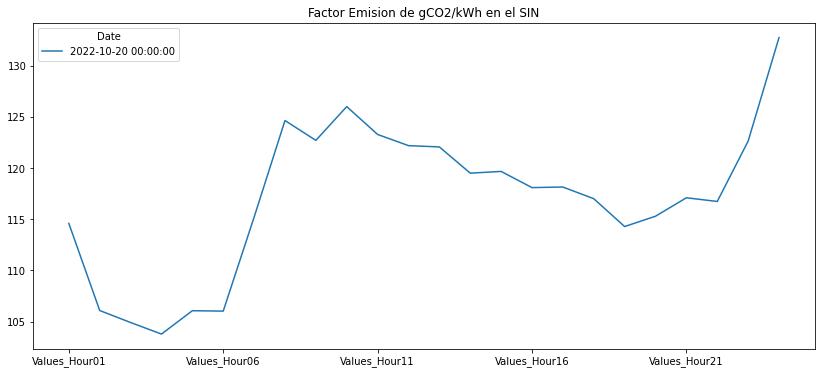

In [197]:
df_CO2 = objetoAPI.request_data('factorEmisionCO2e','Sistema', dt.date(2022, 10, 20), dt.date(2022, 10, 20))
df_CO2.set_index('Date', inplace=True)                               #Uso de la columna de 'Date' como índice
df_CO2['demanda_diaria'] = df_CO2.mean(axis=1, skipna=True, numeric_only=True)

dataframe = pd.DataFrame(df_CO2)
colnames = ['Hora','gCO2/kWh']
dataframe1 = dataframe.transpose()

 
DF = dataframe1.drop(['Id', 'Values_code', 'demanda_diaria'])
my_plot = DF.plot(figsize=(14,6))
plt.title('Factor Emision de gCO2/kWh en el SIN')

# 5. Importación de datos de consumo

In [188]:
Demanda = pd.read_csv('/content/MatrizdeConsumo_1041208.csv', sep=';',decimal=",")
Demanda.tail(6) #Ver encabezado

,FECHA,H01,H02,H03,H04,H05,H06,H07,H08,H09,...,H16,H17,H18,H19,H20,H21,H22,H23,H24,TOTAL
176,2022/10/25,2.93,2.95,2.94,2.97,3.04,11.21,31.28,25.57,21.66,...,35.05,33.17,11.63,9.08,9.33,5.27,1.71,1.62,1.61,312.05
177,2022/10/26,1.65,1.67,1.66,1.61,1.68,10.51,27.62,27.11,12.74,...,38.09,32.71,5.48,2.65,1.83,1.81,1.66,1.68,1.49,298.95
178,2022/10/27,1.54,1.52,1.52,1.54,1.57,11.82,32.05,25.95,18.00,...,27.48,36.87,15.15,11.92,6.37,2.15,2.08,1.65,1.64,268.13
179,2022/10/28,1.60,1.58,1.58,1.65,1.70,12.57,29.87,24.38,16.77,...,37.69,34.50,19.52,8.54,6.67,6.56,6.67,5.88,2.05,355.59
180,2022/10/29,1.74,1.67,1.65,1.68,1.72,12.33,25.09,33.27,26.56,...,31.09,32.09,5.07,2.65,2.74,2.62,2.59,2.54,2.44,274.68
181,2022/10/30,2.49,2.48,2.47,2.44,2.52,9.04,20.81,21.43,6.71,...,16.20,27.45,16.09,2.37,2.38,2.28,2.29,2.27,2.29,175.19


In [209]:
DF = Demanda.loc[171]
DF=DF.drop(['FECHA', 'TOTAL'])
#DF.describe() 
#len(DF)
#DF [1]
DF
ConsumoTotal=sum(DF)
ConsumoTotal*110
 



39752.9

Text(0.5, 1.0, 'Consumo de energía PLANTA INDUSTRIA 20/10/2022')

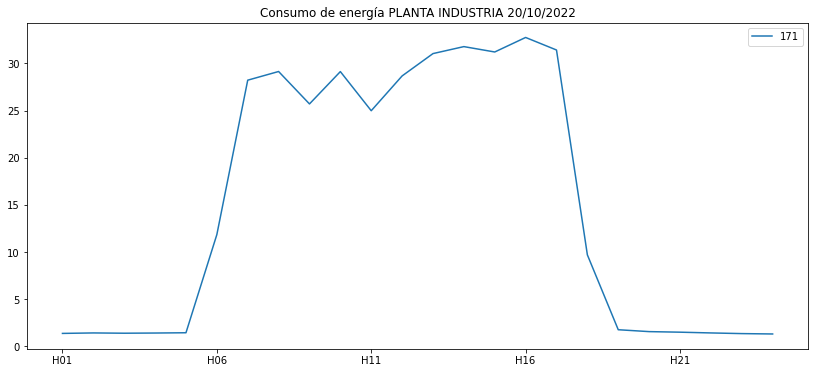

In [203]:
DemandaIndustria=pd.DataFrame(DF)

my_plot = DemandaIndustria.plot(figsize=(14,6))
plt.title('Consumo de energía PLANTA INDUSTRIA 20/10/2022')

In [204]:
DF2= df_demanda.loc[657]
DF2=DF2.drop(['Id', 'Values_code', 'Date'])
#DF2.describe() 
#len (DF2)
#DF2[0]
DF2

Values_Hour01     114.5925
Values_Hour02    106.08807
Values_Hour03    104.91543
Values_Hour04    103.78637
Values_Hour05    106.06759
Values_Hour06    106.02804
Values_Hour07    115.20198
Values_Hour08    124.64223
Values_Hour09    122.70459
Values_Hour10    126.00308
Values_Hour11    123.28155
Values_Hour12    122.19094
Values_Hour13     122.0659
Values_Hour14     119.5026
Values_Hour15    119.67242
Values_Hour16    118.09229
Values_Hour17    118.14837
Values_Hour18    117.00882
Values_Hour19    114.28781
Values_Hour20     115.2957
Values_Hour21    117.09819
Values_Hour22    116.73789
Values_Hour23    122.63098
Values_Hour24    132.74649
Name: 657, dtype: object

43382.341169


Text(0.5, 1.0, 'Contaminación gCO2/kWh en el PLANTA INDUSTRIA 30/10/2022')

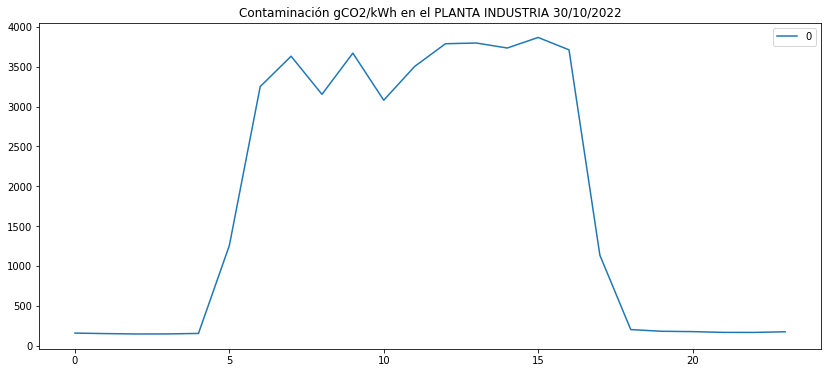

In [207]:
Contaminacion_diaria = list(map(lambda x, y: x*y, DF, DF2))
CD=pd.DataFrame(Contaminacion_diaria)
Total=  sum(Contaminacion_diaria)
print(Total)
my_plot = CD.plot(figsize=(14,6))
plt.title('Contaminación gCO2/kWh en el PLANTA INDUSTRIA 30/10/2022')